In [1]:
import pandas as pd
import numpy as np

#Importing models from sklearn library
#Trying various inbuilt models
#SVM,Naive bayes,KNN,Random Forest, Decision Trees

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn import *

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Reading ASHRAE AND SCALES DATA
# Modify data path accordingly

In [2]:
df = pd.read_csv("/content/ashrae_db2.01.csv")

<ipython-input-2-a9437d0b165b>:1: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/ashrae_db2.01.csv")


In [3]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [4]:
drop_cols = [
    "Publication (Citation)", "Data contributor", "Database",
    "Air temperature (F)", "Operative temperature (F)", "Radiant temperature (F)",
    "Globe temperature (F)", "Tg_h (F)", "Tg_m (F)", "Tg_l (F)",
    "Velocity_h (fpm)", "Velocity_m (fpm)", "Velocity_l (fpm)", "Air velocity (fpm)",
    "Outdoor monthly air temperature (F)"]

In [5]:
df = df.drop(columns=[col for col in drop_cols if col in df.columns])


In [6]:
df = df.dropna(subset=["Thermal sensation", "Air temperature (C)", "Relative humidity (%)"])

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

<ipython-input-7-3ddf3f8e249a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


In [8]:
target_col = "PMV"
X = df.drop(columns=[target_col])
y = df[target_col]

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
categorical_cols = X.select_dtypes(include="object").columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Regression models
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
regression_models = [
    ('linear model', ElasticNet()),
    ('Bayesian Ridge', BayesianRidge()),
    ('KNN Regressor', KNeighborsRegressor(n_neighbors=10, weights='distance')),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=200, max_depth=10)),
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=10)),
    ('AdaBoost Regressor', AdaBoostRegressor(n_estimators=200, random_state=1)),
    ('SVR', SVR())
]


In [21]:
def regression_model_performance(model_name, model, X_train, y_train, X_test, y_test):
    print(f"\n=== Model: {model_name} ===")
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, predicted)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    # Actual vs Predicted Plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=predicted, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.grid(True)
    plt.show()

    # Residual Plot
    residuals = y_test - predicted
    plt.figure(figsize=(6, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution - {model_name}')
    plt.xlabel('Residuals')
    plt.grid(True)
    plt.show()



=== Model: linear model ===
MAE: 0.40
RMSE: 0.64
R^2 Score: 0.36


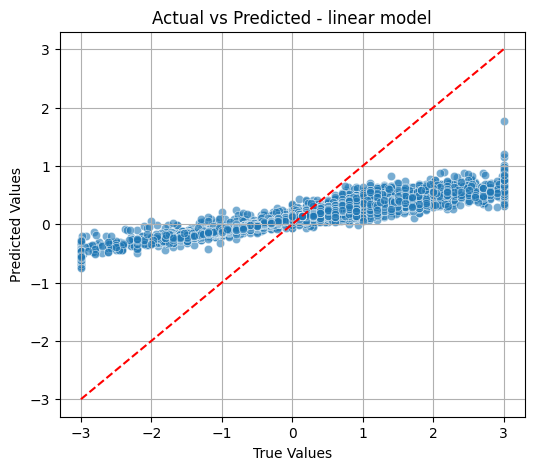

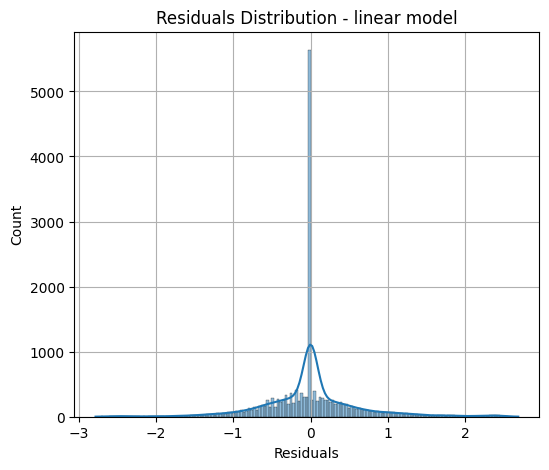


=== Model: Bayesian Ridge ===
MAE: 0.14
RMSE: 0.22
R^2 Score: 0.93


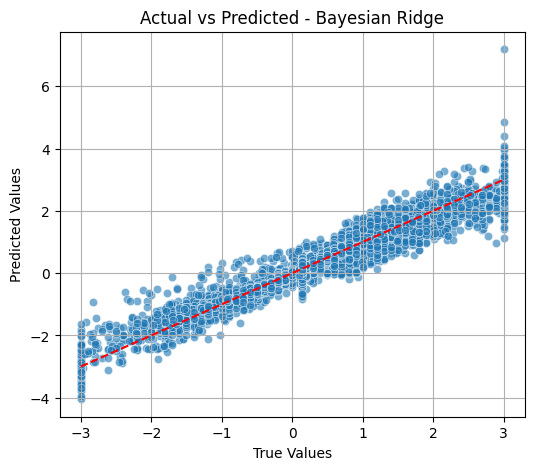

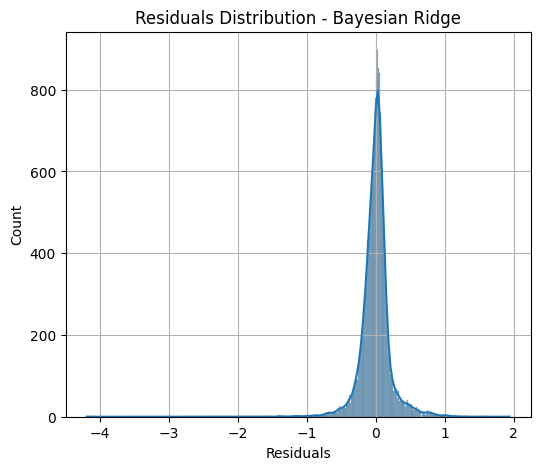


=== Model: KNN Regressor ===
MAE: 0.08
RMSE: 0.13
R^2 Score: 0.97


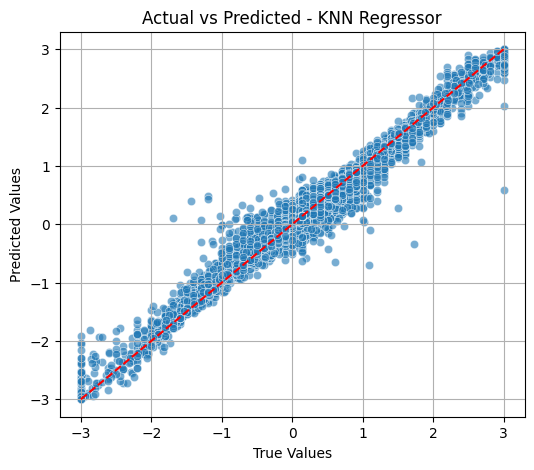

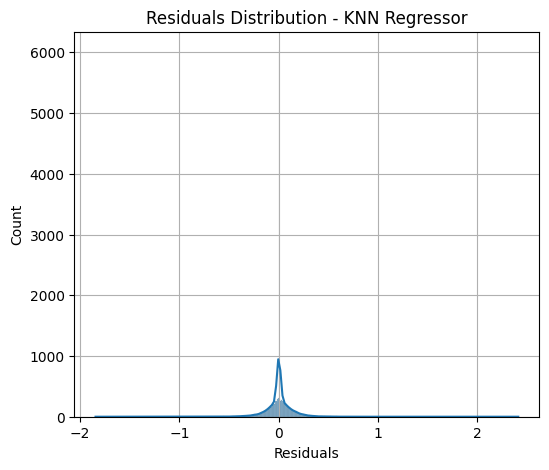


=== Model: Random Forest Regressor ===
MAE: 0.01
RMSE: 0.04
R^2 Score: 1.00


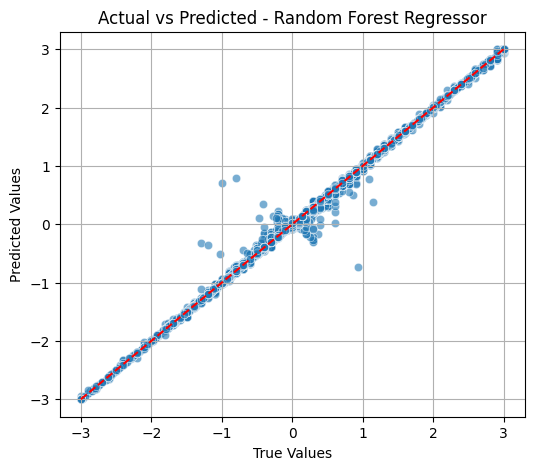

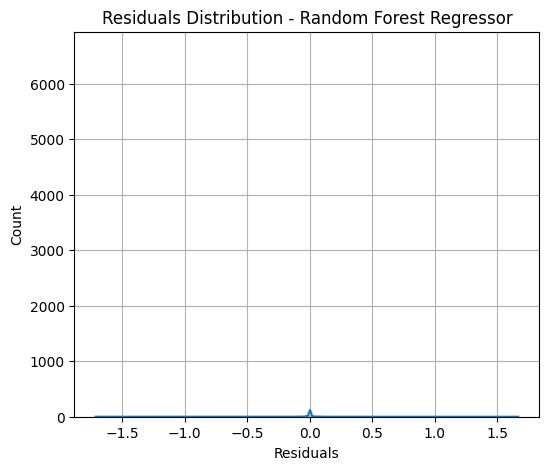


=== Model: Decision Tree Regressor ===
MAE: 0.02
RMSE: 0.05
R^2 Score: 1.00


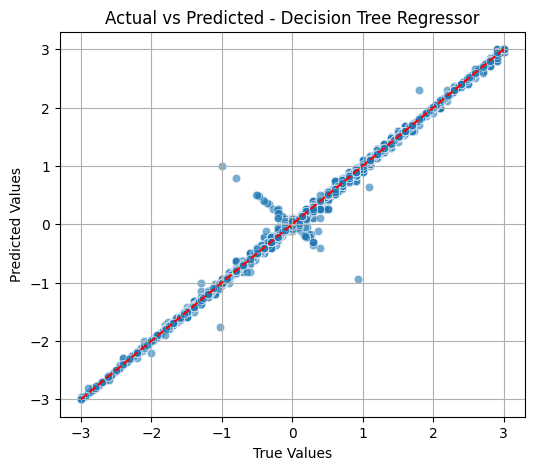

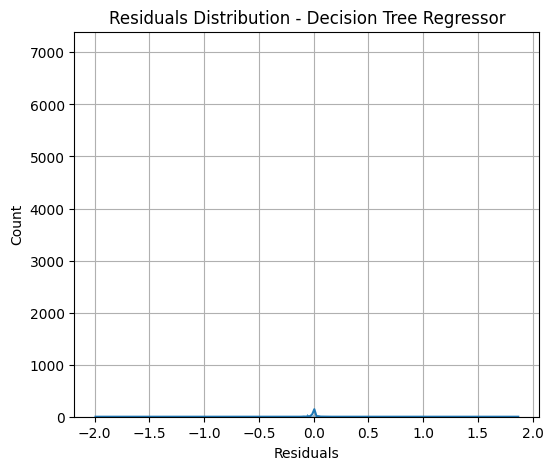


=== Model: AdaBoost Regressor ===
MAE: 0.19
RMSE: 0.22
R^2 Score: 0.92


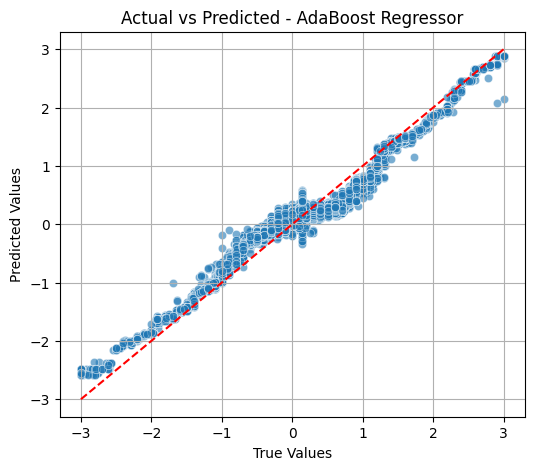

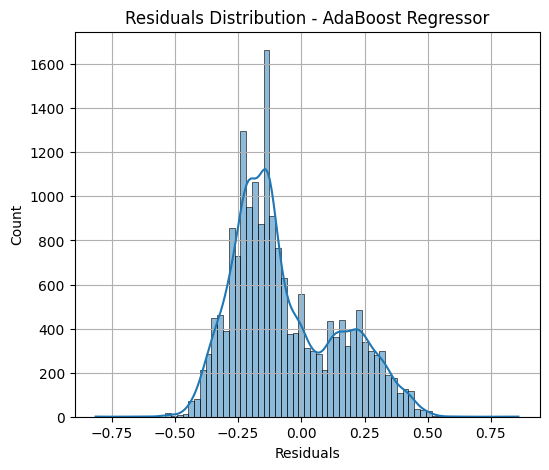


=== Model: SVR ===
MAE: 0.05
RMSE: 0.07
R^2 Score: 0.99


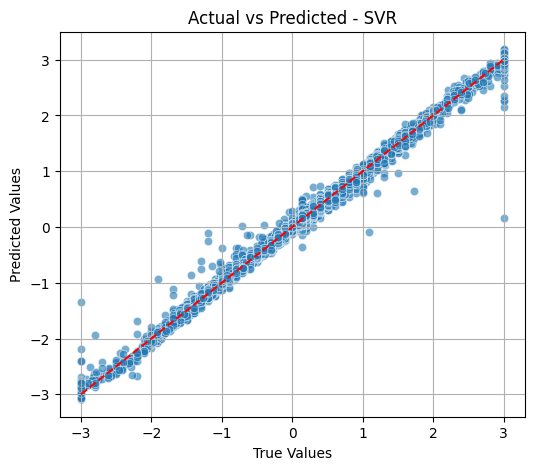

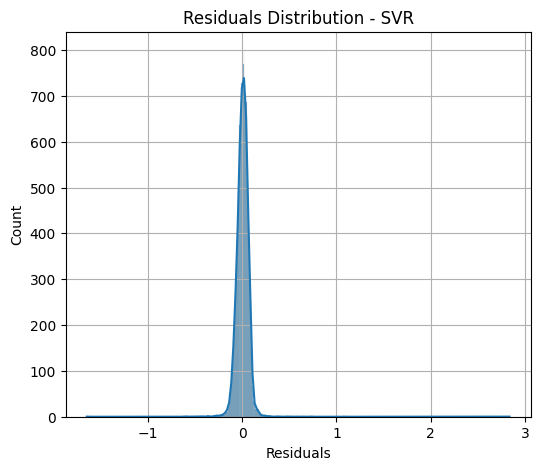

In [22]:
# Run regression models
for name, model in regression_models:
    regression_model_performance(name, model, X_train_scaled, y_train, X_test_scaled, y_test)
